# Minimal native packages research notebook

This notebook holds the research I made to build the `minimal_libs` utility. It expects a `./packages` folder containing the result from `dockerhub_crawler`.

In [1]:
import pandas as pd
import json
image_list = !find packages -type f
image_list[0]

'packages/bp/bpedroso/medium-cicd-buzz.json'

In [2]:
def process_package_data(package, image, pkg_type):
    return {
        "name": package[0],
        "version": package[1],
        "size": package[2],
        "type": pkg_type,
        "distro": image['distribution'],
        "image": image["image"]
    }
from tqdm import tqdm
def get_package_df():
    libs = []
    for path in tqdm(image_list):
        image_name = path[13:]
        with open(path) as json_file:
            try:
                image = json.load(json_file)
                libs += [process_package_data(pack, image, 'native') for pack in image["packages"]["native"]]
                libs += [process_package_data(pack, image, 'python3') for pack in image["packages"]["python3"]]
                libs += [process_package_data(pack, image, 'node') for pack in image["packages"]["node"]]
            except Exception as e:
                #print(e)
                pass
    return libs

In [3]:
from tqdm import tqdm
images_vectors = get_package_df()

100%|██████████| 72821/72821 [03:00<00:00, 403.37it/s]


In [4]:
print(len(images_vectors))
images_vectors_df= pd.DataFrame(images_vectors[:10000000])

31072688


In [5]:
del images_vectors

/home/tristan/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[]

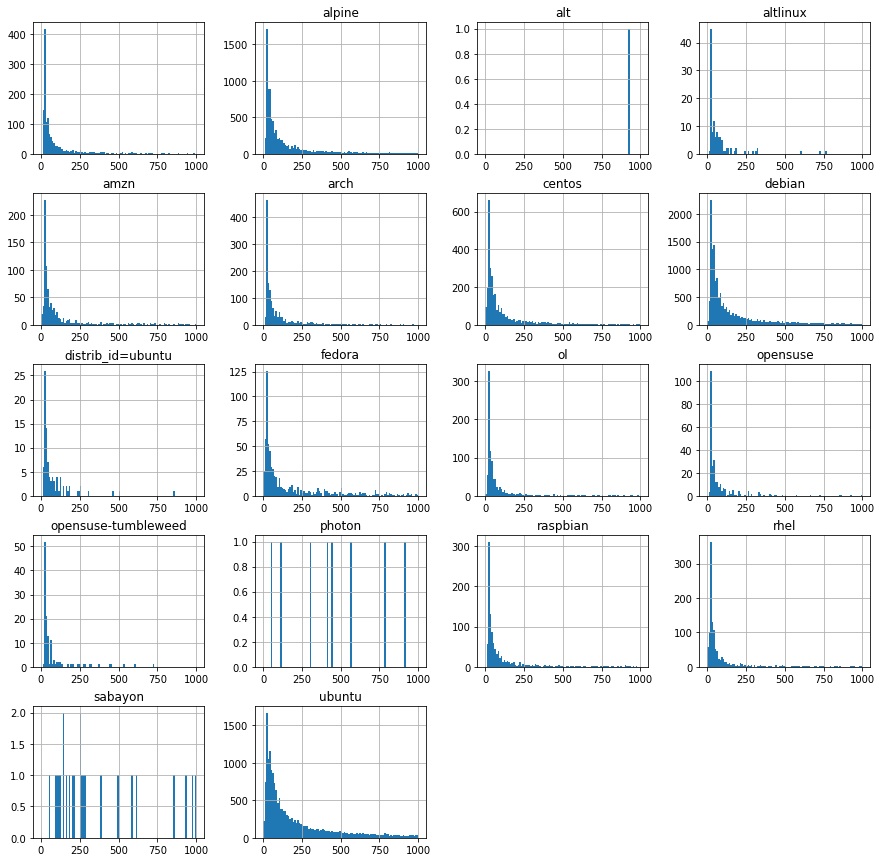

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
images_vectors_df.groupby(['name', 'distro'])['size'].mean().unstack().hist(bins=100, range=(0, 10**3), ax=ax)
plt.plot()

### Library size deviation

Do Libraries from the same version have the same size across different images ?

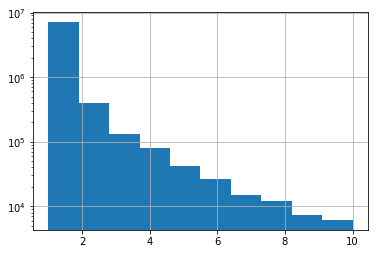

In [7]:
fig, ax = plt.subplots()
images_vectors_df.groupby(['image', 'version', 'name'])['size'].count().hist(bins=10, ax=ax, range=(1, 10))
ax.set_yscale('log')

In [8]:
(images_vectors_df.groupby(['image', 'version', 'name'])['size'].count() > 1).describe()

count     7818207
unique          2
top         False
freq      7070794
Name: size, dtype: object

In [9]:
images_keras = images_vectors_df[images_vectors_df['name'] == 'Keras']['image']
images_keras
native_libraries = images_vectors_df[images_vectors_df['type'] == 'native']
co_occurences_keras = native_libraries[native_libraries['image'].isin(images_keras)]


[]

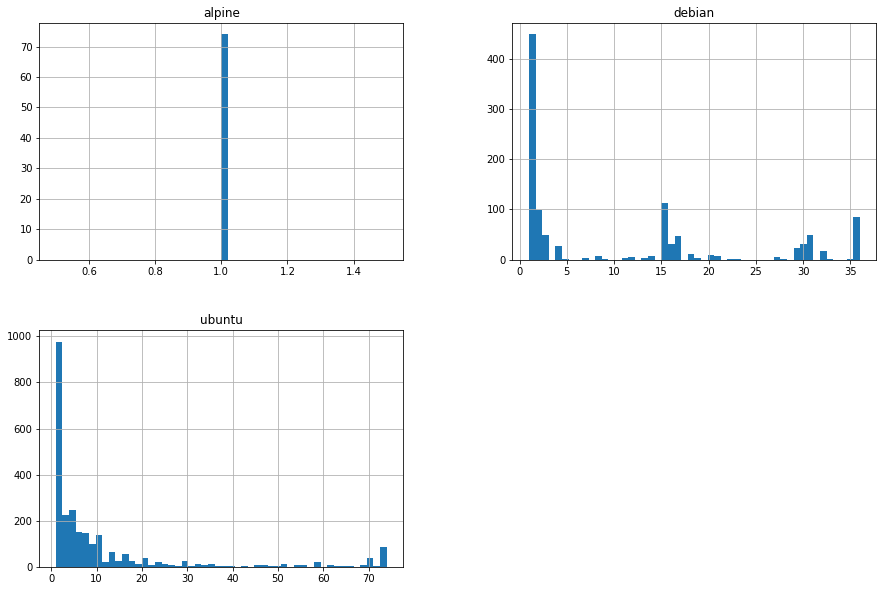

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
co_occurences_keras.groupby(['name','distro'])['image'].count().unstack().hist(bins=50, ax=ax)
plt.plot()

In [11]:
quantiles = co_occurences_keras.groupby(['name','distro'])['image'].count().unstack().quantile(q=0.95)

In [12]:
images_vectors_df[images_vectors_df['name'] == 'Keras'].groupby('distro').count()

,image,name,size,type,version
distro,,,,,
alpine,1,1,1,1,1
debian,36,36,36,36,36
ubuntu,75,75,75,75,75


In [13]:
cooc = co_occurences_keras.groupby(['name','distro'])['image'].count().unstack()
cooc
print(quantiles)
libs = {}
for index in quantiles.index:
    libs[index] = cooc[index][cooc[index] >= quantiles[index]].index

distro
alpine     1.0
debian    36.0
ubuntu    69.6
Name: 0.95, dtype: float64


In [14]:
native_libraries.groupby(["name", "distro"]).image.count()


,,image,size,type,version
name,distro,,,,
.postgis-rundeps,alpine,6,6,6,6
0ad,debian,1,1,1,1
0ad-data,debian,1,1,1,1
0ad-data-common,debian,1,1,1,1
0install,ubuntu,2,2,2,2
0install-core,ubuntu,2,2,2,2
9menu,debian,1,1,1,1
BigInsights_QSE-IOP-2.13.1-IOP-4_2,centos,1,1,1,1
CentrifyDC,centos,1,1,1,1


In [15]:
liboccurence = native_libraries.groupby(["name","distro"]).image.nunique()
nimage = native_libraries.groupby(["distro"]).image.nunique()
defaultlibs = {distro:[] for distro in libs}
for distro in libs:
    for lib in libs[distro]:
        if liboccurence[lib, distro] == nimage[distro]:
            defaultlibs[distro] += [lib]

In [16]:
neededlibs = {distro:set() for distro in defaultlibs}

for distro in defaultlibs:
    neededlibs[distro] =  set(libs[distro])-set(defaultlibs[distro])
neededlibs

{'alpine': {'bash',
  'binutils',
  'ca-certificates',
  'ca-certificates-cacert',
  'curl',
  'curl-dev',
  'cython',
  'db',
  'expat',
  'file',
  'freetype',
  'freetype-dev',
  'g++',
  'gcc',
  'gdbm',
  'gfortran',
  'gmp',
  'isl',
  'libatomic',
  'libbz2',
  'libc-dev',
  'libcrypto1.1',
  'libcurl',
  'libffi',
  'libgcc',
  'libgfortran',
  'libgomp',
  'libldap',
  'libmagic',
  'libpng',
  'libpng-dev',
  'libpq',
  'libquadmath',
  'libsasl',
  'libssh2',
  'libssh2-dev',
  'libssl1.1',
  'libstdc++',
  'libtls-standalone',
  'm4',
  'make',
  'mpc1',
  'mpfr3',
  'musl-dev',
  'ncurses-libs',
  'ncurses-terminfo',
  'ncurses-terminfo-base',
  'nghttp2-dev',
  'nghttp2-libs',
  'openblas',
  'openblas-dev',
  'openblas-ilp64',
  'openssl-dev',
  'pkgconf',
  'postgresql-dev',
  'postgresql-libs',
  'py3-gunicorn',
  'python2',
  'python3',
  'python3-dev',
  'readline',
  'sqlite-libs',
  'ssl_client',
  'xz-libs',
  'zlib-dev'},
 'debian': {'adduser',
  'bsdutils',
  'c

[]

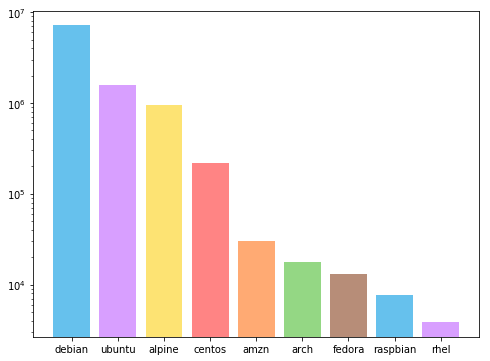

In [17]:
distros = ['rhel', 'raspbian', 'fedora', 'arch', 'amzn', 'centos', 'alpine', 'ubuntu', 'debian']
fig, ax = plt.subplots(figsize=(8,6))
colors = [
    '#0198E1',  # blue
    '#BF5FFF',  # purple
    '#FCD116',  # yellow
    '#FF3333',  # red
    '#FF7216',  # orange
    '#4DBD33',  # green
    '#87421F'   # brown
]
distros_df = images_vectors_df[images_vectors_df.distro.isin(distros)].groupby('distro').name.count().sort_values(ascending=False)
plt.bar(range(len(distros_df.index)), distros_df, tick_label=distros_df.index, color=colors, alpha=0.6)
ax.set_yscale('log')
plt.plot()

[]

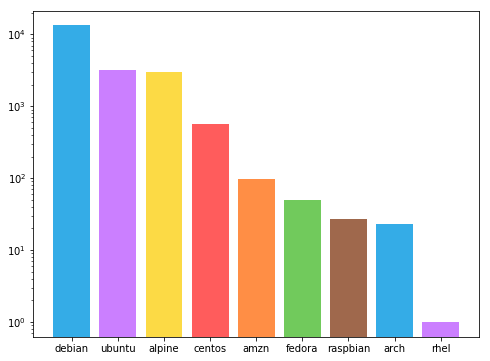

In [18]:
distros = ['rhel', 'raspbian', 'fedora', 'arch', 'amzn', 'centos', 'alpine', 'ubuntu', 'debian']
fig, ax = plt.subplots(figsize=(8,6))
colors = [
    '#0198E1',  # blue
    '#BF5FFF',  # purple
    '#FCD116',  # yellow
    '#FF3333',  # red
    '#FF7216',  # orange
    '#4DBD33',  # green
    '#87421F'   # brown
]
distros_df = images_vectors_df[images_vectors_df.distro.isin(distros)].groupby(['distro']).image.nunique().sort_values(ascending=False)
plt.bar(range(len(distros_df.index)), distros_df, tick_label=distros_df.index, color=colors, alpha=0.8)
ax.set_yscale('log')
plt.plot()

In [24]:
python_libs = images_vectors_df[images_vectors_df.type=='python3'].groupby('name').distro.count()

In [29]:
python_libs.sort_values(ascending=False).to_csv(path_or_buf="./python_libs.csv")

/home/tristan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [30]:
images_vectors_df.to_csv(path_or_buf="./libraries_raw.csv")